In [1]:
import logging
logging.basicConfig(level=logging.INFO)

# ACS-ACS2
Notatnik przedstawiający użycie algorytmów ACS i ACS2 dla przykładowego problemu Maze

## Środowisko

In [2]:
import gym
import gym_maze

In [3]:
# Listowanie dostępnych środowisk
filter_envs = lambda env: env.id.startswith("Maze") or env.id.startswith("Woods")

all_envs = [env for env in gym.envs.registry.all()]
maze_envs = [env for env in all_envs if filter_envs(env)]

for env in maze_envs:
    print("Maze ID: [{}], non-deterministic: [{}]".format(
            env.id, env.nondeterministic))

Maze ID: [MazeF1-v0], non-deterministic: [False]
Maze ID: [MazeF2-v0], non-deterministic: [False]
Maze ID: [MazeF3-v0], non-deterministic: [False]
Maze ID: [MazeF4-v0], non-deterministic: [True]
Maze ID: [Maze4-v0], non-deterministic: [False]
Maze ID: [Maze5-v0], non-deterministic: [False]
Maze ID: [Maze6-v0], non-deterministic: [True]
Maze ID: [MazeT2-v0], non-deterministic: [False]
Maze ID: [MazeT3-v0], non-deterministic: [False]
Maze ID: [MazeT4-v0], non-deterministic: [True]
Maze ID: [Maze228-v0], non-deterministic: [True]
Maze ID: [Maze252-v0], non-deterministic: [True]
Maze ID: [Maze288-v0], non-deterministic: [True]
Maze ID: [Maze324-v0], non-deterministic: [True]


In [4]:
# Użycie przykładowego środowika
MAZE = "MazeF1-v0"

maze = gym.make(MAZE)
situation = maze.reset()

maze.render()


■ ■ ■ ■
■ □ $ ■
■ □ ■ ■
■ □ A ■
■ □ ■ ■
■ ■ ■ ■


In [5]:
# przykład zwracanej percepcji (używana przez agenta)
situation 

['1', '1', '1', '1', '1', '0', '0', '0']

## Algorytmy
Każdy algorytm ma swój obiekt konfiguracji który pozwala dostosować go do wybranego środowiska, określić parametry, zdefiniować własne metryki itp.

Domyślne metryki to liczba kroków w trialu oraz ostateczna nagroda.

In [6]:
import lcs.agents.acs as acs
import lcs.agents.acs2 as acs2

### ACS

In [7]:
acs_cfg = acs.Configuration(classifier_length=8, number_of_possible_actions=8, epsilon=0.9, metrics_trial_frequency=5)
acs_agent = acs.ACS(acs_cfg)

In [8]:
# eksploracja
acs_population, acs_explore_metrics = acs_agent.explore(maze, 500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 23, 'reward': 1000, 'perf_time': 0.004979328979970887}
INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 17, 'reward': 1000, 'perf_time': 0.005170493997866288}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 15, 'reward': 1000, 'perf_time': 0.004103032988496125}
INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 30, 'reward': 1000, 'perf_time': 0.008430760994087905}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.014560273004462942}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 9, 'reward': 1000, 'perf_time': 0.002387760003330186}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 28, 'reward': 1000, 'perf_time': 0.007193817000370473}
INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 7, 'reward': 1000, 'perf_time': 0.0019813560065813363}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.012760959012666717}
INFO:lcs.agents.Agen

In [9]:
# przykład populacji (quality - reward - fitness)
for cl in sorted(acs_population, key=lambda c: -c.fitness)[:20]:
    print(cl)

0910#### 0 1191#### (empty)               q: 1.0   r: 271.2  f: 271.2 
11#11000 7 09#00111 (empty)               q: 1.0   r: 251.0  f: 251.0 
#101#### 0 #910#### (empty)               q: 1.0   r: 239.4  f: 239.4 
1191#### 4 0910#### (empty)               q: 1.0   r: 234.2  f: 234.2 
00###111 1 11###000 (empty)               q: 1.0   r: 156.5  f: 156.5 
#910#### 4 #101#### (empty)               q: 1.0   r: 137.8  f: 137.8 
09#00111 3 11#11000 (empty)               q: 1.0   r: 131.8  f: 131.8 
1#1#1000 6 0#0#0111 (empty)               q: 1.0   r: 120.3  f: 120.3 
#01#1### 0 #10#0### (empty)               q: 1.0   r: 117.5  f: 117.5 
11###000 5 00###111 (empty)               q: 1.0   r: 116.4  f: 116.4 
#10#0### 4 #01#1### (empty)               q: 1.0   r: 112.1  f: 112.1 
0#0#0111 2 1#1#1000 (empty)               q: 1.0   r: 105.1  f: 105.0 
######## 4 ######## (empty)               q: 1.9e-09 r: 200.6  f: 3.809e-07
######## 0 ######## (empty)               q: 3.14e-11 r: 242.8  f: 7.616

### ACS2

In [10]:
acs2_cfg = acs2.Configuration(classifier_length=8, number_of_possible_actions=8, epsilon=0.9, metrics_trial_frequency=5)
acs2_agent = acs2.ACS2(acs2_cfg)

In [11]:
# eksploracja
acs2_population, acs2_explore_metrics = acs2_agent.explore(maze, 500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 47, 'reward': 1000, 'perf_time': 0.018493223993573338}
INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 27, 'reward': 1000, 'perf_time': 0.016718879982363433}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 6, 'reward': 1000, 'perf_time': 0.0034206380078103393}
INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 22, 'reward': 1000, 'perf_time': 0.01230887699057348}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.02800431801006198}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.026174594997428358}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.030467581003904343}
INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 3, 'reward': 1000, 'perf_time': 0.0017615800024941564}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 18, 'reward': 1000, 'perf_time': 0.009686998004326597}
INFO:lcs.agents.Agent:{'

In [12]:
# przykład populacji (quality - reward - fitness)
for cl in sorted(acs2_population, key=lambda c: -c.fitness)[:20]:
    print(cl)

###0#### 1 ########         (empty)               q: 1.0   r: 1e+03  ir: 1e+03  f: 1e+03  exp: 250 tga: 55    talp: 12530 tav: 44.6   num: 1
#9###### 1 ########         (empty)               q: 1.0   r: 1e+03  ir: 1e+03  f: 1e+03  exp: 249 tga: 63    talp: 12530 tav: 44.6   num: 1
##9##### 2 ########         (empty)               q: 1.0   r: 999.2  ir: 999.2  f: 998.8  exp: 139 tga: 221   talp: 12491 tav: 91.4   num: 1
####0### 1 ########         (empty)               q: 1.0   r: 452.1  ir: 452.1  f: 452.1  exp: 720 tga: 46    talp: 12567 tav: 18.6   num: 1
1####### 2 ########         (empty)               q: 1.0   r: 316.0  ir: 316.0  f: 316.0  exp: 490 tga: 428   talp: 12562 tav: 31.9   num: 1
##9##### 1 ########         (empty)               q: 0.999 r: 0.2282 ir: 0.2282 f: 0.2281 exp: 128 tga: 308   talp: 12529 tav: 1.36e+02 num: 1
#9###### 2 ########         (empty)               q: 1.0   r: 0.0001656 ir: 0.0001656 f: 0.0001656 exp: 244 tga: 280   talp: 12511 tav: 68.0   num: 1
##

## Eksploitacja

In [13]:
# Agent może zostać zainicjalizowany z początkowową wiedzą
acs_exploiter_agent = acs.ACS(acs_cfg, acs_population)

# A potem użyty w następujący sposób
acs_exploit_population, acs_exploit_metrics = acs_exploiter_agent.exploit(maze, 50)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.009311678993981332}
INFO:lcs.agents.Agent:{'trial': 5, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.008491670014336705}
INFO:lcs.agents.Agent:{'trial': 10, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.012026921001961455}
INFO:lcs.agents.Agent:{'trial': 15, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.007844556006602943}
INFO:lcs.agents.Agent:{'trial': 20, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.009314456023275852}
INFO:lcs.agents.Agent:{'trial': 25, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.0080328680051025}
INFO:lcs.agents.Agent:{'trial': 30, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.011184767005033791}
INFO:lcs.agents.Agent:{'trial': 35, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.010848648002138361}
INFO:lcs.agents.Agent:{'trial': 40, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.010741824982687831}
INFO:lcs.agents.Agent:{'trial': 45, 'steps_in_tria

## Własne metryki

Zdefiniowanie własnej metryki - np. aktualny rozmiar populacji w danym trialu

In [17]:
# własna funkcja która jako argument zawiera aktualną populację klasyfikatorów oraz testowane środowisko
# zwraca słownik - możliwośc użycia wielu metryk
def custom_metrics(agent, environment):
    return {
        'population': len(agent.population),
    }

In [18]:
# metrykę należy umieścic w obiekcie konfiguracji agenta, np.
acs2_cfg = acs2.Configuration(classifier_length=8,
                              number_of_possible_actions=8,
                              epsilon=0.9,
                              user_metrics_collector_fcn=custom_metrics,
                              metrics_trial_frequency=1)

# ponowna inicjalizacja
acs2_agent = acs2.ACS2(acs2_cfg)

# i uruchomienie
acs2_population, acs2_explore_metrics = acs2_agent.explore(maze, 500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 2, 'reward': 1000, 'perf_time': 0.0012873880041297525, 'population': 2}
INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 41, 'reward': 1000, 'perf_time': 0.023306999006308615, 'population': 83}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 2, 'reward': 1000, 'perf_time': 0.000945945008425042, 'population': 79}
INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 50, 'reward': 0, 'perf_time': 0.02787771201110445, 'population': 79}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 16, 'reward': 1000, 'perf_time': 0.007892353023635224, 'population': 79}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 2, 'reward': 1000, 'perf_time': 0.0009848009794950485, 'population': 79}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 7, 'reward': 1000, 'perf_time': 0.0038635200180578977, 'population': 79}
INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 18, 'reward': 1000, 'perf_time': 0.009213035984430462, 'po

Metryki zbierane są z określoną częstotliwością (w konfiguracji). Są obiektem typu słownik który da się łatwo przetwarzać.

In [19]:
import pandas as pd

df = pd.DataFrame(acs2_explore_metrics)
df.set_index('trial', inplace=True)

df.head()

,steps_in_trial,reward,perf_time,population
trial,,,,
0,2,1000,0.001287,2
1,10,1000,0.004451,10
2,15,1000,0.007040,19
3,47,1000,0.038495,33
4,48,1000,0.031514,47


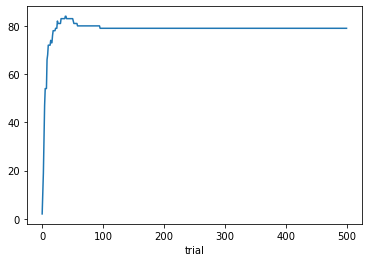

In [20]:
df['population'].plot();